This notebook is in serious need of a cleanup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvDirectory = './results'

csvList = [
    'BDT_cv_results_1000.csv',
    'BDT_cv_results_50.csv',
    'BDT_cv_results_200.csv',
    'BDT_cv_results_500.csv'
]

In [3]:
dfList = []
for csvFile in csvList:
    dfList.append(pd.read_csv(csvDirectory + '/' + csvFile))

In [4]:
cv_results = pd.concat(dfList, ignore_index=True)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,213.981292,1.164490,0.738236,0.006465,0.05,4,3,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.982916,0.000488,65,0.988508,0.988167,0.988204,0.988602,0.988319,0.988360,1.696088e-04
1,283.305558,0.735272,0.748193,0.004537,0.05,4,3,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.982695,0.000642,68,0.988197,0.987959,0.988054,0.988200,0.988226,0.988127,1.036357e-04
2,375.143950,0.930405,0.713469,0.003057,0.05,4,6,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.982199,0.000922,74,0.989346,0.989088,0.989063,0.989126,0.989133,0.989151,1.006390e-04
3,522.150459,1.604328,0.717559,0.003031,0.05,4,6,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.983071,0.000634,63,0.988998,0.988853,0.988742,0.988975,0.988987,0.988911,9.948356e-05
4,537.671386,1.772891,0.704888,0.002058,0.05,4,9,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.982910,0.001035,66,0.989807,0.989618,0.989541,0.989717,0.989173,0.989571,2.184258e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,603.222363,7.227479,1.991869,0.011822,0.20,14,3,500,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.983425,0.000703,52,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
428,643.475693,13.544991,1.653632,0.066579,0.20,14,6,500,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.982670,0.001212,63,0.999843,0.999536,0.999696,0.999853,1.000000,0.999786,1.576458e-04
429,897.539192,6.826510,1.762550,0.014923,0.20,14,6,500,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.983395,0.001034,53,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
430,868.754197,6.882538,1.542067,0.048995,0.20,14,9,500,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.983024,0.000557,60,1.000000,0.999989,1.000000,0.999703,0.999837,0.999906,1.185794e-04


In [5]:
list(cv_results)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_learning_rate',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'param_subsample',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [6]:
def transform_cv_results(cv_results, params, nsplits=5):
    test_scores = cv_results.loc[:, params + [f'split{i}_test_score' for i in range(nsplits)]]
    test_scores.set_index(params, inplace=True)
    test_scores.rename({f'split{i}_test_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    test_scores = pd.DataFrame(test_scores.stack()).rename({0 : 'score'}, axis='columns')
    test_scores['dataset'] = 'test'
    test_scores.set_index('dataset', inplace=True, append=True)
    test_scores.index.set_names(names='split', level=len(params), inplace=True)

    train_scores = cv_results.loc[:, params + [f'split{i}_train_score' for i in range(nsplits)]]
    train_scores.set_index(params, drop=True, inplace=True)
    train_scores.rename({f'split{i}_train_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    train_scores = pd.DataFrame(train_scores.stack()).rename({0 : 'score'}, axis='columns')
    train_scores['dataset'] = 'train'
    train_scores.set_index('dataset', inplace=True, append=True)
    train_scores.index.set_names(names='split', level=len(params), inplace=True)

    return pd.concat([test_scores, train_scores]).reset_index()

In [7]:
cv_results['diff_score'] = cv_results['mean_train_score'] - cv_results['mean_test_score']

In [8]:
parameters = {'max_depth'        : list(range(4, 15, 2)),
              'max_features'     : [3, 6, 9],
              'learning_rate'    : [0.05, 0.1, 0.2],
              'subsample'        : [0.7, 1.0],
              'n_estimators'     : [50, 1000, 200]
} #500

In [9]:
cv_results_scores = transform_cv_results(cv_results, [f'param_{name}' for name in parameters.keys()])

In [10]:
cv_results_scores.set_index([f'param_{name}' for name in parameters.keys()] + ['split', 'dataset'], inplace=True)

In [11]:
cv_results_scores_train = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
cv_results_scores_test = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
cv_results_scores_diff = (cv_results_scores_train - cv_results_scores_test)

In [12]:
cv_results_scores['score difference'] = cv_results_scores_diff['score']

In [13]:
cv_results_scores.reset_index(inplace=True)
cv_results_scores.rename({'param_max_depth' : 'max depth', 
                          'param_max_features' : 'max features per split node',
                          'param_learning_rate' : 'learning rate',
                          'param_subsample' : 'sub sample per split node',
                          'param_n_estimators' : '# of trees'
}, inplace=True, axis='columns')

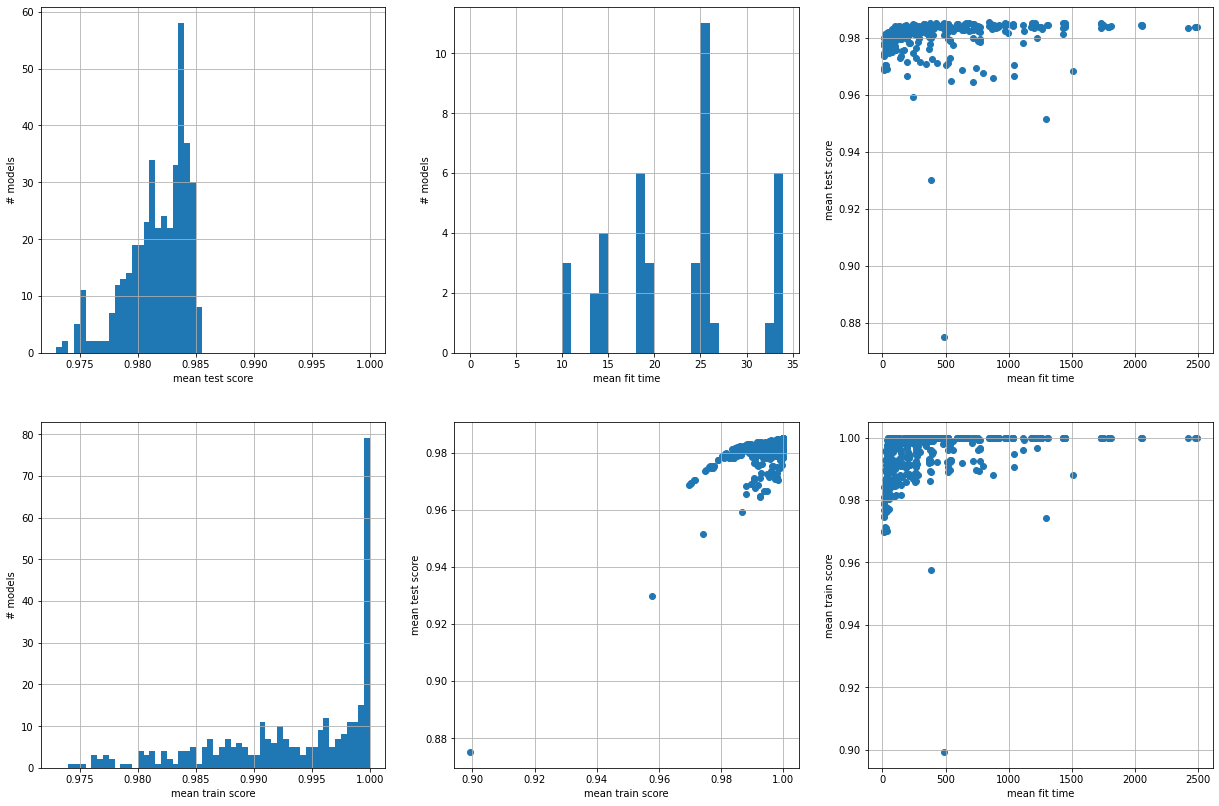

In [14]:
plt.figure(figsize=(21,14))

score_bins = np.arange(0.973, 1, 0.0005)
time_bins = np.arange(0, 35, 1)

plt.subplot(2, 3, 1)
plt.hist(cv_results['mean_test_score'], bins=score_bins)
plt.xlabel("mean test score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 2)
plt.hist(cv_results['mean_fit_time'], bins=time_bins)
plt.xlabel("mean fit time")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_test_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 4)
plt.hist(cv_results['mean_train_score'], bins=score_bins)
plt.xlabel("mean train score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(cv_results['mean_train_score'], cv_results['mean_test_score'])
plt.xlabel("mean train score")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_train_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean train score")
plt.grid()

plt.show()

In [25]:
cv_results.loc[cv_results['mean_test_score'] > 0.983, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('diff_score')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
3,0.983071,0.000634,0.988911,522.150459,0.005839,0.05,4,6,1000,1.0
5,0.983121,0.000570,0.989207,766.267006,0.006087,0.05,4,9,1000,1.0
331,0.983760,0.000547,0.991633,198.465136,0.007873,0.05,6,3,500,1.0
333,0.983665,0.000641,0.992471,372.182367,0.008806,0.05,6,6,500,1.0
335,0.983832,0.000568,0.992666,547.182282,0.008834,0.05,6,9,500,1.0
...,...,...,...,...,...,...,...,...,...,...
321,0.983204,0.000908,1.000000,362.611768,0.016796,0.20,14,6,200,1.0
285,0.983175,0.000677,1.000000,368.363851,0.016825,0.10,14,6,200,1.0
430,0.983024,0.000557,0.999906,868.754197,0.016881,0.20,14,9,500,0.7
287,0.983116,0.000765,1.000000,502.933658,0.016884,0.10,14,9,200,1.0


In [16]:
cv_results.loc[cv_results['mean_test_score'] > 0.985, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
20,0.985274,0.000613,1.000000,844.541572,0.014726,0.05,10,6,1000,0.7
23,0.985184,0.000604,1.000000,1728.716324,0.014816,0.05,10,9,1000,1.0
22,0.985179,0.000672,1.000000,1211.345457,0.014821,0.05,10,9,1000,0.7
18,0.985147,0.000540,1.000000,485.890537,0.014853,0.05,10,3,1000,0.7
21,0.985113,0.000730,1.000000,1187.571474,0.014887,0.05,10,6,1000,1.0
17,0.985098,0.000521,0.999832,1431.628117,0.014735,0.05,8,9,1000,1.0
14,0.985083,0.000607,0.999899,684.035717,0.014815,0.05,8,6,1000,0.7
19,0.985055,0.000681,1.000000,658.281409,0.014945,0.05,10,3,1000,1.0


In [19]:
cv_results.loc[cv_results['mean_test_score'] > 0.985, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('mean_fit_time')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
18,0.985147,0.000540,1.000000,485.890537,0.014853,0.05,10,3,1000,0.7
19,0.985055,0.000681,1.000000,658.281409,0.014945,0.05,10,3,1000,1.0
14,0.985083,0.000607,0.999899,684.035717,0.014815,0.05,8,6,1000,0.7
20,0.985274,0.000613,1.000000,844.541572,0.014726,0.05,10,6,1000,0.7
21,0.985113,0.000730,1.000000,1187.571474,0.014887,0.05,10,6,1000,1.0
22,0.985179,0.000672,1.000000,1211.345457,0.014821,0.05,10,9,1000,0.7
17,0.985098,0.000521,0.999832,1431.628117,0.014735,0.05,8,9,1000,1.0
23,0.985184,0.000604,1.000000,1728.716324,0.014816,0.05,10,9,1000,1.0
